In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd ../gdrive/MyDrive/ImageProcClass

Mounted at /gdrive
/gdrive/MyDrive/ImageProcClass


#DK CH5

In [ ]:
a = [1,2,3]
b = a
b[0] = 999
print(a, b)

[999, 2, 3] [999, 2, 3]


In [ ]:
a = [1,2,3]
b = a.copy()
b[0] = 999
print(a, b)

[1, 2, 3] [999, 2, 3]


숫자도 다 객체다 이말이야!

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/histogram.cpp:160: error: (-215:Assertion failed) j < nimages in function 'histPrepareImages'


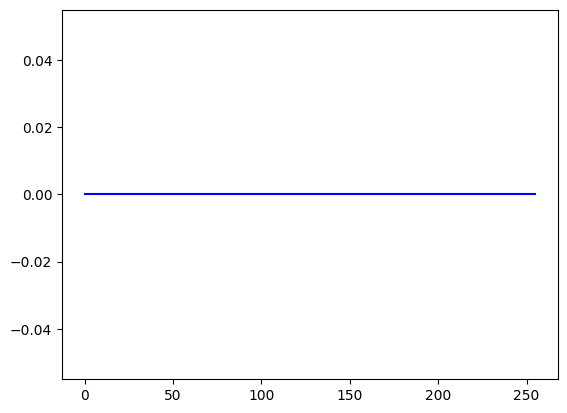

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = "Dongkeun-OpenCV-ImgData/lena.jpg"
src = cv2.imread(image_path)
histColor = ('b', 'g', 'r')

for i in range(3):
  hist = cv2.calcHist([src], [i], None, [256], [0, 256])
  plt.plot(hist, color=histColor[i])

plt.show()

In [ ]:
src = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src)



# MO4 CH6

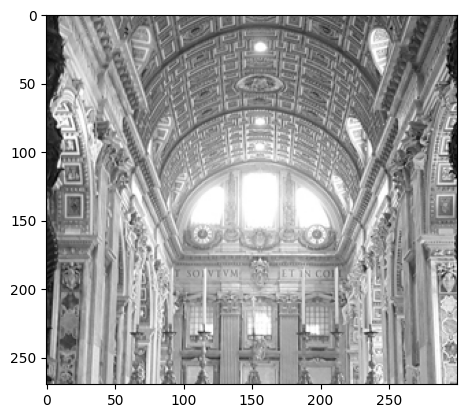

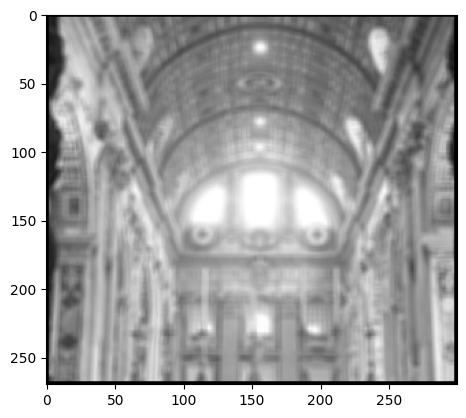

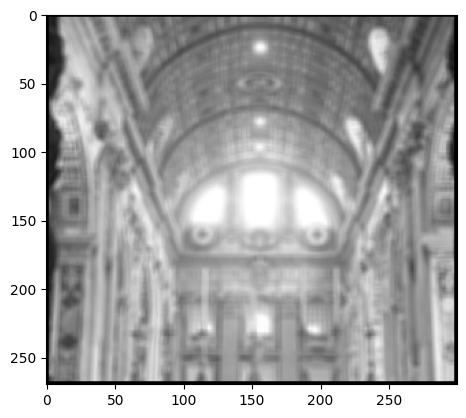

In [ ]:
import numpy as np, cv2, time

# 회선 수행 함수 - 행렬 처리 방식(속도 면에서 유리)
def filter(image, mask):
    rows, cols = image.shape[:2]
    dst = np.zeros((rows, cols), np.float32)                 # 회선 결과 저장 행렬
    xcenter, ycenter = mask.shape[1]//2, mask.shape[0]//2  # 마스크 중심 좌표

    for i in range(ycenter, rows - ycenter):                  # 입력 행렬 반복 순회
        for j in range(xcenter, cols - xcenter):
            y1, y2 = i - ycenter, i + ycenter + 1               # 관심영역 높이 범위
            x1, x2 = j - xcenter, j + xcenter + 1               # 관심영역 너비 범위
            roi = image[y1:y2, x1:x2].astype("float32")         # 관심영역 형변환

            tmp = cv2.multiply(roi, mask)                       # 회선 적용 - OpenCV 곱셈
            dst[i, j] = cv2.sumElems(tmp)[0]                    # 출력화소 저장
    return dst                                                  # 자료형 변환하여 반환

# 회선 수행 함수 - 화소 직접 근접
def filter2(image, mask):
    rows, cols = image.shape[:2]
    dst = np.zeros((rows, cols), np.float32)                 # 회선 결과 저장 행렬
    xcenter, ycenter = mask.shape[1]//2, mask.shape[0]//2  # 마스크 중심 좌표

    for i in range(ycenter, rows - ycenter):                  # 입력 행렬 반복 순회
        for j in range(xcenter, cols - xcenter):
            sum = 0.0
            for u in range(mask.shape[0]):                    # 마스크 원소 순회
                for v in range(mask.shape[1]):
                    y, x = i + u - ycenter , j + v - xcenter
                    sum += image[y, x] * mask[u, v]           # 회선 수식
            dst[i, j] = sum
    return dst

image = cv2.imread("JB5/filter_blur.jpg", cv2.IMREAD_GRAYSCALE)  # 영상 읽기
if image is None: raise Exception("영상파일 읽기 오류")

# 블러링 마스크 원소 지정
# data = [1/9, 1/9, 1/9,
#         1/9, 1/9, 1/9,
#         1/9, 1/9, 1/9]

data = [1/25, 1/25, 1/25, 1/25, 1/25,
        1/25, 1/25, 1/25, 1/25, 1/25,
        1/25, 1/25, 1/25, 1/25, 1/25,
        1/25, 1/25, 1/25, 1/25, 1/25,
        1/25, 1/25, 1/25, 1/25, 1/25]



mask = np.array(data, np.float32).reshape(5, 5)
blur1 = filter(image, mask)                                    # 회선 수행 - 화소 직접 접근
blur2 = filter2(image, mask)                                   # 회선 수행

import matplotlib.pyplot as plt



plt.imshow(image, cmap="gray")
plt.show()
plt.imshow(blur1, cmap="gray")
plt.show()
plt.imshow(blur2, cmap="gray")
plt.show()

In [ ]:
import numpy as np, cv2
from Common.filters import filter

image = cv2.imread("images/filter_sharpen.jpg", cv2.IMREAD_GRAYSCALE) # 영상 읽기
if image is None: raise Exception("영상파일 읽기 오류")

# 샤프닝 마스크 원소 지정
data1 = [0, -1, 0,
        -1, 5, -1,
         0, -1, 0]
data2 = [[-1, -1, -1],
         [-1, 9, -1],
         [-1, -1, -1]]
mask1 = np.array(data1, np.float32).reshape(3, 3)
mask2 = np.array(data2, np.float32)

sharpen1 = filter(image, mask1)                     # 회선 수행 – 저자 구현 함
sharpen2 = filter(image, mask2)
sharpen1 = cv2.convertScaleAbs(sharpen1)
sharpen2 = cv2.convertScaleAbs(sharpen2)

plt.imshow(image, cmap="gray")
plt.show()
plt.imshow(sharpen1, cmap="gray")
plt.show()

ModuleNotFoundError: No module named 'Common'

# a

In [ ]:
import numpy as np, cv2

image = cv2.imread("images/laplacian.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

data1 = [	[0,		1,		0],  												# 4 방향 필터
			[1, 	-4,		1],
			[0, 	1,		0]]
data2 = [	[-1,	-1,		-1],													# 8 방향 필터
			[-1, 	8, 	    -1],
			[-1, 	-1, 	-1]]
mask4 = np.array(data1, np.int16)   # 음수가 있으므로 자료형이 int8인 행렬 선언
mask8 = np.array(data2, np.int16)
# OpenCV 함수 cv2.filter2D() 통한 라플라시안 수행
dst1 = cv2.filter2D(image, cv2.CV_16S, mask4)
dst2 = cv2.filter2D(image, cv2.CV_16S, mask8)
dst3 = cv2.Laplacian(image, cv2.CV_16S, 1)      # OpenCV 라플라시안 수행 함수

cv2.imshow("image", image)
cv2.imshow("filter2D 4-direction", cv2.convertScaleAbs(dst1))
cv2.imshow("filter2D 8-direction", cv2.convertScaleAbs(dst2))
cv2.imshow("Laplacian_OpenCV", cv2.convertScaleAbs(dst3))
cv2.waitKey(0)

In [ ]:
import numpy as np, cv2
from Common.utils import ck_time
def nonmax_suppression(sobel, direct):
    rows, cols = sobel.shape[:2]
    dst = np.zeros((rows, cols), np.float32)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # 행렬 처리를 통해 이웃 화소 가져오기
            values = sobel[i-1:i+2, j-1:j+2].flatten()
            first = [3, 0, 1, 2]
            id = first[direct[i, j]]
            v1, v2 = values[id], values[8-id]

            ## if 문으로 이웃 화소 가져오기
            # if direct[i, j] == 0: # 기울기 방향 0도
            #     v1, v2 = sobel[i, j-1], sobel[i, j+1]
            # if direct[i, j] == 1: # 기울기 방향 45도
            #     v1, v2 = sobel[i-1, j-1], sobel[i+1, j+1]
            # if direct[i, j] == 2: # 기울기 방향 90도
            #     v1, v2 = sobel[i-1, j], sobel[i+1, j]
            # if direct[i, j] == 3: # 기울기 방향 135도
            #     v1, v2 = sobel[i+1, j-1], sobel[i-1, j+1]

            dst[i, j] = sobel[i, j] if (v1 < sobel[i , j] > v2) else 0
    return dst

def nonmax_suppression1(sobel, direct):
    rows, cols = sobel.shape[:2]
    dst = np.zeros((rows, cols), np.float32)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            values = sobel[i-1:i+2, j-1:j+2].flat
            max = np.max(values)
            dst[i, j] = sobel[i, j] if sobel[i , j] >= max else 0
    return dst

def trace(max_sobel, i, j, low):
    h, w = max_sobel.shape
    if (0 <= i < h and 0 <= j < w) == False: return  # 추적 화소 범위 확인
    if pos_ck[i, j] == 0 and max_sobel[i, j] > low:
        pos_ck[i, j] = 255
        canny[i, j] = 255
        trace(max_sobel, i - 1, j - 1, low)# 추적 함수 재귀 호출 - 8방향 추적
        trace(max_sobel, i    , j - 1, low)
        trace(max_sobel, i + 1, j - 1, low)
        trace(max_sobel, i - 1, j    , low)
        trace(max_sobel, i + 1, j    , low)
        trace(max_sobel, i - 1, j + 1, low)
        trace(max_sobel, i    , j + 1, low)
        trace(max_sobel, i + 1, j + 1, low)

def hysteresis_th(max_sobel, low, high):                # 이력 임계값 수행
    rows, cols = max_sobel.shape[:2]
    for i in range(1, rows - 1):  # 에지 영상 순회
        for j in range(1, cols - 1):
            if max_sobel[i, j] > high:  trace(max_sobel, i, j, low)  # 추적 시작

image = cv2.imread("images/canny.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상 파일 읽기 오류")
pos_ck = np.zeros(image.shape[:2], np.uint8)
canny = np.zeros(image.shape[:2], np.uint8)

# 사용자 정의 캐니 에지
gaus_img = cv2.GaussianBlur(image, (5, 5), 0.3)
Gx = cv2.Sobel(np.float32(gaus_img), cv2.CV_32F, 1, 0, 3)  # x방향 마스크
Gy = cv2.Sobel(np.float32(gaus_img), cv2.CV_32F, 0, 1, 3)  # y방향 마스크
#sobel = cv2.magnitude(Gx, Gy)                            # 두 행렬 벡터 크기
sobel = np.fabs(Gx) + np.fabs(Gy)                       # 두 행렬 절댓값 덧셈
directs = cv2.phase(Gx, Gy) / (np.pi / 4)
directs = directs.astype(int) % 4
max_sobel = nonmax_suppression(sobel, directs)   # 비최대치 억제
hysteresis_th(max_sobel, 100, 150)          # 이력 임계값
canny2 = cv2.Canny(image, 100, 150)                 # OpenCV 캐니 에지

cv2.imshow("image", image)
cv2.imshow("canny", canny)                 # 사용자 정의 캐니
cv2.imshow("OpenCV_Canny", canny2)           # OpenCV 캐니 에지
cv2.waitKey(0)

# DK07

In [ ]:
color_edge_path = "Dongkeun-OpenCV-ImgData/color_edge.jpg"
canny_path = "Dongkeun-OpenCV-ImgData/canny.jpg"
smoothing_path = "Dongkeun-OpenCV-ImgData/smoothing.jpg"
vehicle_path = "Dongkeun-OpenCV-ImgData/vehicle.jpg"

In [ ]:
def image_out(img):
  image_out = img[:,:,::-1]
  return image_out

error: OpenCV(4.11.0) /io/opencv/modules/highgui/src/window_QT.cpp:644: error: (-27:Null pointer) NULL guiReceiver (please create a window) in function 'cvCreateTrackbar2'


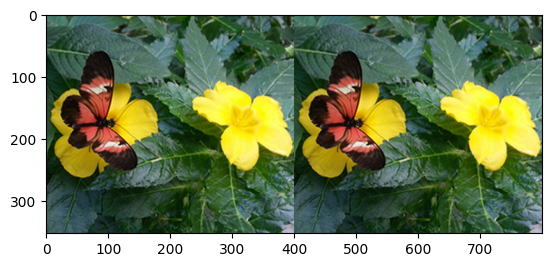

In [ ]:
import cv2

def onTrackbar(th):																	# 트랙바 콜백 함수
	edge = cv2.GaussianBlur(gray, (5, 5), 0)         	# 가우시안 블러링
	edge = cv2.Canny(edge, th, th*2, 5)						# 캐니 에지 검출

	color_edge = cv2.copyTo(image, mask=edge)
	dst = cv2.hconcat([image, color_edge])
	cv2.imshow("color edge", dst)

image = cv2.imread(color_edge_path, cv2.IMREAD_COLOR)
if image is None: raise Exception("영상파일 읽기 오류")

th = 50
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    	# 명암도 영상 변환
dst = cv2.hconcat([image, image])


import matplotlib.pyplot as plt

plt.imshow(image_out(dst))
cv2.createTrackbar("Canny th", "color edge", th, 150, onTrackbar)	# 콜백 함수 등록
onTrackbar(th)																					# 콜백 함수 첫 실행
cv2.waitKey(0)

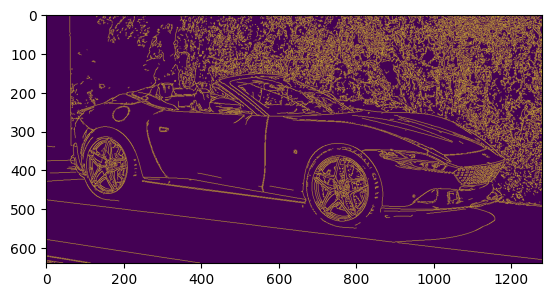

In [ ]:
import numpy as np, cv2
from Common.utils import ck_time
def nonmax_suppression(sobel, direct):
    rows, cols = sobel.shape[:2]
    dst = np.zeros((rows, cols), np.float32)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # 행렬 처리를 통해 이웃 화소 가져오기
            values = sobel[i-1:i+2, j-1:j+2].flatten()
            first = [3, 0, 1, 2] # 각도
            id = first[direct[i, j]]
            v1, v2 = values[id], values[8-id]

            ## if 문으로 이웃 화소 가져오기
            # if direct[i, j] == 0: # 기울기 방향 0도
            #     v1, v2 = sobel[i, j-1], sobel[i, j+1]
            # if direct[i, j] == 1: # 기울기 방향 45도
            #     v1, v2 = sobel[i-1, j-1], sobel[i+1, j+1]
            # if direct[i, j] == 2: # 기울기 방향 90도
            #     v1, v2 = sobel[i-1, j], sobel[i+1, j]
            # if direct[i, j] == 3: # 기울기 방향 135도
            #     v1, v2 = sobel[i+1, j-1], sobel[i-1, j+1]

            dst[i, j] = sobel[i, j] if (v1 < sobel[i , j] > v2) else 0
    return dst

def nonmax_suppression1(sobel, direct):
    rows, cols = sobel.shape[:2]
    dst = np.zeros((rows, cols), np.float32)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            values = sobel[i-1:i+2, j-1:j+2].flat
            max = np.max(values)
            dst[i, j] = sobel[i, j] if sobel[i , j] >= max else 0
    return dst

def trace(max_sobel, i, j, low):
    h, w = max_sobel.shape
    if (0 <= i < h and 0 <= j < w) == False: return  # 추적 화소 범위 확인
    if pos_ck[i, j] == 0 and max_sobel[i, j] > low:
        pos_ck[i, j] = 255
        canny[i, j] = 255
        trace(max_sobel, i - 1, j - 1, low)# 추적 함수 재귀 호출 - 8방향 추적
        trace(max_sobel, i    , j - 1, low)
        trace(max_sobel, i + 1, j - 1, low)
        trace(max_sobel, i - 1, j    , low)
        trace(max_sobel, i + 1, j    , low)
        trace(max_sobel, i - 1, j + 1, low)
        trace(max_sobel, i    , j + 1, low)
        trace(max_sobel, i + 1, j + 1, low)

def hysteresis_th(max_sobel, low, high):                # 이력 임계값 수행
    rows, cols = max_sobel.shape[:2]
    for i in range(1, rows - 1):  # 에지 영상 순회
        for j in range(1, cols - 1):
            if max_sobel[i, j] > high:  trace(max_sobel, i, j, low)  # 추적 시작

image = cv2.imread(vehicle_path, cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상 파일 읽기 오류")
pos_ck = np.zeros(image.shape[:2], np.uint8)
canny = np.zeros(image.shape[:2], np.uint8)

# 사용자 정의 캐니 에지
# gaus_img = cv2.GaussianBlur(image, (5, 5), 0.3)
# Gx = cv2.Sobel(np.float32(gaus_img), cv2.CV_32F, 1, 0, 3)  # x방향 마스크
# Gy = cv2.Sobel(np.float32(gaus_img), cv2.CV_32F, 0, 1, 3)  # y방향 마스크
# #sobel = cv2.magnitude(Gx, Gy)                            # 두 행렬 벡터 크기
# sobel = np.fabs(Gx) + np.fabs(Gy)                       # 두 행렬 절댓값 덧셈
# directs = cv2.phase(Gx, Gy) / (np.pi / 4)
# directs = directs.astype(int) % 4
# max_sobel = nonmax_suppression(sobel, directs)   # 비최대치 억제
# hysteresis_th(max_sobel, 100, 150)          # 이력 임계값
canny2 = cv2.Canny(image, 100, 150)                 # OpenCV 캐니 에지

import matplotlib.pyplot as plt

#plt.subplot(1,2,1)
#plt.imshow(image)
#plt.subplot(1,3,2)
#plt.imshow(canny)                 # 사용자 정의 캐니
#plt.subplot(1,2,2)
plt.imshow(canny2)           # OpenCV 캐니 에지

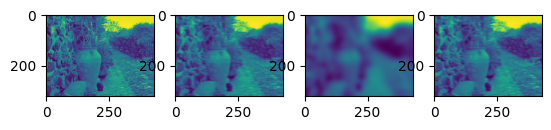

In [ ]:
import numpy as np, cv2

def getGaussianMask(ksize, sigmaX, sigmaY):
    sigma = 0.3 * ((np.array(ksize) - 1.0) * 0.5 - 1.0) + 0.8  # 표준 편차
    if sigmaX <= 0: sigmaX = sigma[0]
    if sigmaY <= 0: sigmaY = sigma[1]

    x = np.arange(0, ksize[0]+1, 1) - ksize[0] // 2
    y = np.arange(0, ksize[1]+1, 1) - ksize[1] // 2
    x, y = np.meshgrid(x, y)
    ratio = 1 / (sigmaX*sigmaY * 2 * np.pi)
    v1 = x ** 2 / (2 * sigmaX ** 2)
    v2 = y ** 2 / (2 * sigmaY ** 2 )
    mask = ratio * np.exp(-(v1+v2))
    return mask / np.sum(mask)

image = cv2.imread(smoothing_path, cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

ksize = (17, 5)                                        # 크기는 가로x세로로 표현
gaussian_2d = getGaussianMask(ksize, 0, 0)
gaussian_1dX = cv2.getGaussianKernel(ksize[0], 0, cv2.CV_32F)   # 가로 방향 마스크
gaussian_1dY = cv2.getGaussianKernel(ksize[1], 0, cv2.CV_32F)   # 세로 방향 마스크

gauss_img1 = cv2.filter2D(image, -1, gaussian_2d)     # 사용자 생성 마스크 적용
gauss_img2 = cv2.GaussianBlur(image, (0,0), 10.7, 1.3)
gauss_img3 = cv2.sepFilter2D(image, -1, gaussian_1dX, gaussian_1dY)


import matplotlib.pyplot as plt

plt.subplot(1,4,1)
plt.imshow(image)
plt.subplot(1,4,2)
plt.imshow(gauss_img1)                 # 사용자 정의 캐니
plt.subplot(1,4,3)
plt.imshow(gauss_img2)
plt.subplot(1,4,4)
plt.imshow(gauss_img3)

lines.shape= (10370, 1, 4)


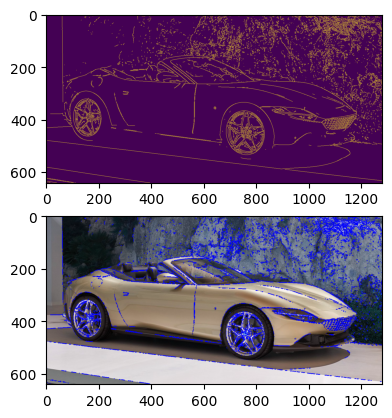

In [ ]:
src = cv2.imread(vehicle_path)
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 200, 250)
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180.0, threshold=50)
print('lines.shape=', lines.shape)

for line in lines:
    x1, y1, x2, y2   = line[0]
    cv2.line(src,(x1,y1),(x2,y2),(0,0,255),2)

plt.subplot(2,1,1)
plt.imshow(edges)
plt.subplot(2,1,2)
plt.imshow(src)

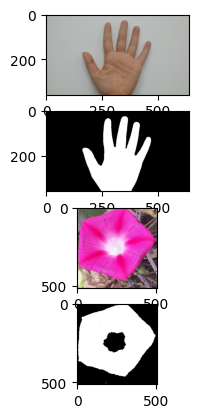

In [ ]:
# 0705.py
import cv2
import numpy as np

hand_path = "Dongkeun-OpenCV-ImgData/hand.jpg"
flower_path = "Dongkeun-OpenCV-ImgData/flower.jpg"

#1
src1 = cv2.imread(hand_path)
hsv1 = cv2.cvtColor(src1, cv2.COLOR_BGR2HSV)
lowerb1 = (0, 40, 0)
upperb1 = (20, 180, 255)
dst1 = cv2.inRange(hsv1, lowerb1, upperb1)

#2
src2 = cv2.imread(flower_path)
hsv2 = cv2.cvtColor(src2,cv2.COLOR_BGR2HSV)
lowerb2 = (150, 100, 100)
upperb2 = (180, 255, 255)
dst2 = cv2.inRange(hsv2, lowerb2, upperb2)


plt.subplot(4,1,1)
plt.imshow(src1[:,:,::-1])
plt.subplot(4,1,2)
plt.imshow(dst1, cmap='gray')
plt.subplot(4,1,3)
plt.imshow(src2[:,:,::-1])
plt.subplot(4,1,4)
plt.imshow(dst2, cmap='gray')

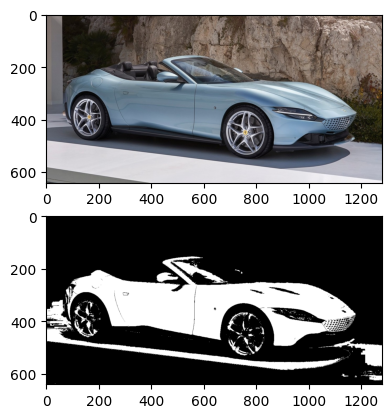

In [ ]:
src1 = cv2.imread(vehicle_path)
hsv1 = cv2.cvtColor(src1, cv2.COLOR_BGR2HSV)
lowerb1 = (90, 20, 100) #색도 #채도 #명도
upperb1 = (130, 255, 255)
dst1 = cv2.inRange(hsv1, lowerb1, upperb1)



plt.subplot(2,1,1)
plt.imshow(src1[:,:,::-1])
plt.subplot(2,1,2)
plt.imshow(dst1, cmap='gray')

len(contours)= 5
contours[0].shape= (124, 1, 2)
contours= (array([[[189, 270]],

       [[188, 271]],

       [[181, 271]],

       [[180, 272]],

       [[177, 272]],

       [[176, 273]],

       [[172, 273]],

       [[171, 274]],

       [[169, 274]],

       [[168, 275]],

       [[165, 275]],

       [[164, 276]],

       [[163, 276]],

       [[162, 277]],

       [[161, 277]],

       [[160, 278]],

       [[159, 278]],

       [[158, 279]],

       [[157, 279]],

       [[156, 280]],

       [[155, 280]],

       [[154, 281]],

       [[153, 281]],

       [[151, 283]],

       [[150, 283]],

       [[144, 289]],

       [[144, 290]],

       [[142, 292]],

       [[142, 293]],

       [[141, 294]],

       [[141, 296]],

       [[140, 297]],

       [[140, 304]],

       [[141, 305]],

       [[141, 306]],

       [[142, 307]],

       [[142, 308]],

       [[143, 309]],

       [[143, 310]],

       [[150, 317]],

       [[151, 317]],

       [[153, 319]],

       [[154, 319

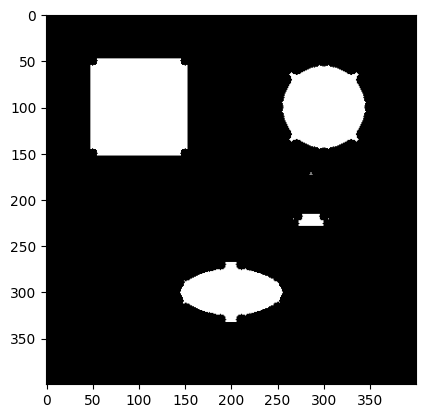

In [ ]:
import cv2
import numpy as np

img = np.zeros((400,400), dtype=np.uint8)

cv2.rectangle(img, (50,50), (150,150), 255, -1)
cv2.circle(img, (300,100), 50, 255, -1)
cv2.ellipse(img, (200,300), (60,30), 0, 0, 360, 255, -1)
cv2.putText(img, 'A', (250,250), 0, 4, 255, 8)



#2
mode = cv2.RETR_LIST
method = cv2.CHAIN_APPROX_SIMPLE;
contours, hierarchy = cv2.findContours(img, mode, method)
cv2.drawContours(img, contours, -1, (255,0,0), 3)

print('len(contours)=', len(contours))
print('contours[0].shape=', contours[0].shape)
print('contours=', contours)

#3
for cnt in contours:
    cv2.drawContours(img, [cnt], 0, (255,0,0), 3)

    for pt in cnt:
        cv2.circle(img, (pt[0][0], pt[0][1]), 5, (0,0,255), -1)




import matplotlib.pyplot as plt

plt.imshow(img, cmap="gray")
plt.show()

len(contours)= 3
contours[0].shape= (4, 1, 2)
contours= (array([[[200, 200]],

       [[200, 300]],

       [[300, 300]],

       [[300, 200]]], dtype=int32), array([[[ 99, 150]],

       [[100, 149]],

       [[400, 149]],

       [[401, 150]],

       [[401, 350]],

       [[400, 351]],

       [[100, 351]],

       [[ 99, 350]]], dtype=int32), array([[[ 50, 100]],

       [[ 50, 400]],

       [[450, 400]],

       [[450, 100]]], dtype=int32))


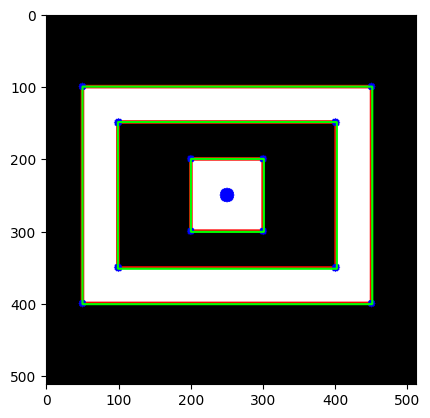

In [ ]:
# 0707.py
import cv2
import numpy as np

#1
src = np.zeros(shape=(512,512,3), dtype=np.uint8)
cv2.rectangle(src, (50, 100), (450, 400), (255, 255, 255), -1)
cv2.rectangle(src, (100, 150), (400, 350), (0, 0, 0), -1)
cv2.rectangle(src, (200, 200), (300, 300), (255, 255, 255), -1)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

#2
mode = cv2.RETR_LIST
method = cv2.CHAIN_APPROX_SIMPLE;
contours, hierarchy = cv2.findContours(gray, mode, method)
##cv2.drawContours(src, contours, -1, (255,0,0), 3)

print('len(contours)=', len(contours))
print('contours[0].shape=', contours[0].shape)
print('contours=', contours)

#3
for cnt in contours:
    cv2.drawContours(src, [cnt], 0, (255,0,0), 3)

    for pt in cnt:
        cv2.circle(src, (pt[0][0], pt[0][1]), 5, (0,0,255), -1)

    M = cv2.moments(cnt)

    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cv2.circle(src, (cx, cy), 10, (0,0,255), -1)

    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(src, (x,y), (x+w,y+h), (0,255,0),2)

plt.imshow(src, cmap='gray')
plt.show()


src: 0.0 51.0 (0, 0) (100, 250)
src: 0.0 8.0 (0, 0) (52, 200)


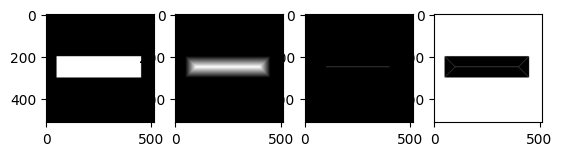

In [ ]:
# 0709.py
import cv2
import numpy as np

#1
src = np.zeros(shape=(512,512), dtype=np.uint8)
cv2.rectangle(src, (50, 200), (450, 300), (255, 255, 255), -1)

#2
dist  = cv2.distanceTransform(src, distanceType=cv2.DIST_L1, maskSize=3)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dist)
print('src:', minVal, maxVal, minLoc, maxLoc)

dst = cv2.normalize(dist, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
ret, dst2 = cv2.threshold(dist, maxVal-1, 255, cv2.THRESH_BINARY)

#3
gx = cv2.Sobel(dist, cv2.CV_32F, 1, 0, ksize = 3)
gy = cv2.Sobel(dist, cv2.CV_32F, 0, 1, ksize = 3)
mag   = cv2.magnitude(gx, gy)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(mag)
print('src:', minVal, maxVal, minLoc, maxLoc)
ret, dst3 = cv2.threshold(mag, maxVal-2, 255, cv2.THRESH_BINARY_INV)

plt.subplot(1,4,1)
plt.imshow(src, cmap='gray')
plt.subplot(1,4,2)
plt.imshow(dst, cmap='gray')
plt.subplot(1,4,3)
plt.imshow(dst2, cmap='gray')
plt.subplot(1,4,4)
plt.imshow(dst3, cmap='gray')
plt.show()

dist: 0.0 483.0 (308, 177) (1108, 0)
len(contours)= 5


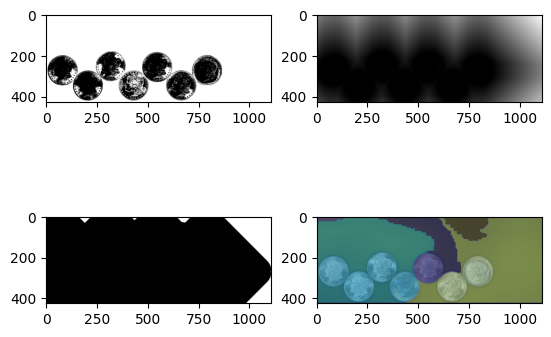

In [ ]:
# 0711.py
import cv2
import numpy as np

#1
src = cv2.imread('coins.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, bImage = cv2.threshold(gray, 0, 255,
                                cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
dist  = cv2.distanceTransform(bImage, cv2.DIST_L1, 3)
dist8 = cv2.normalize(dist, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plt.subplot(2,2,1)
plt.imshow(bImage, cmap='gray')
plt.subplot(2,2,2)
plt.imshow(dist8, cmap='gray')

#2
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dist)
print('dist:', minVal, maxVal, minLoc, maxLoc)
mask = (dist > maxVal*0.5).astype(np.uint8)*255
plt.subplot(2,2,3)
plt.imshow(mask, cmap='gray')

#3
mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(mask, mode, method)
print('len(contours)=', len(contours))

markers= np.zeros(shape=src.shape[:2], dtype=np.int32)
for i, cnt in enumerate(contours):
    cv2.drawContours(markers, [cnt], 0, i+1, -1)

#4
dst = src.copy()
cv2.watershed(src,  markers)

dst[markers == -1] = [0, 0, 255] # 경계선
for i in range(len(contours)): # 분할영역
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst[markers == i+1] = [b, g, r]
dst = cv2.addWeighted(src, 0.4, dst, 0.6, 0) # 합성

plt.subplot(2,2,4)
plt.imshow(dst, cmap='gray')

plt.show()